# Primera parte

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("country_vaccinations.csv")

In [2]:
#Limpiamos y agrupamos por país
vac_by_country = df.groupby('country').agg({'people_vaccinated':'max','people_fully_vaccinated':'max'})

In [3]:
country_with_most_vaccinated_people = vac_by_country['people_vaccinated'].idxmax()
people_vaccinated = vac_by_country['people_vaccinated'].max()
print(f'El país con más vacunados es {country_with_most_vaccinated_people} con {int(people_vaccinated)} vacunados')

El país con más vacunados es United States con 125822868 vacunados


# Segunda parte

In [4]:
top10 = vac_by_country.nlargest(10,'people_vaccinated')
top10

,people_vaccinated,people_fully_vaccinated
country,,
United States,125822868.0,78498290.0
India,102349255.0,14874254.0
United Kingdom,32444439.0,8513864.0
England,27251419.0,7054720.0
Brazil,24809790.0,8000733.0
Germany,15393858.0,5350247.0
Turkey,11708135.0,7737134.0
France,11654420.0,4121706.0
Indonesia,10457337.0,5550906.0


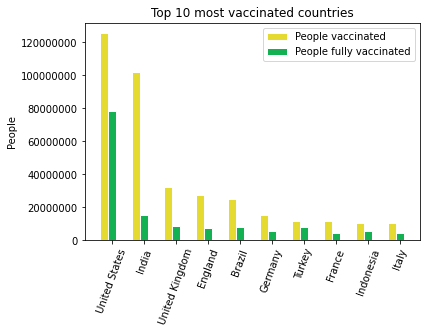

In [6]:
import numpy as np
# set width of bars
barWidth = 0.25

# get labels
labels = top10.index.to_list()

# set heights of bars
bars1 = top10['people_vaccinated'].to_list()
bars2 = top10['people_fully_vaccinated'].to_list()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#e5da30', width=barWidth, edgecolor='white', label='People vaccinated')
plt.bar(r2, bars2, color='#13b151',width=barWidth, edgecolor='white', label='People fully vaccinated')
 
# Add xticks on the middle of the group bars and rotate
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
plt.xticks(rotation=70)

#Change y labels format
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('People')
# Create legend & Show graphic
plt.title('Top 10 most vaccinated countries')
plt.legend()
plt.show()

## Stacked bar plot (for fun)

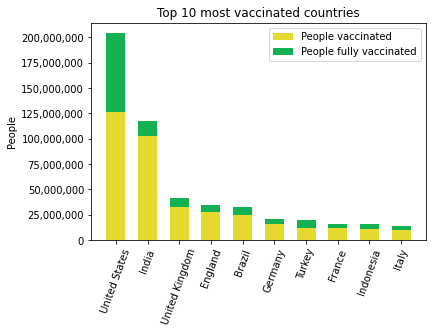

In [7]:
import matplotlib
labels = top10.index.to_list()
simple_vac = top10['people_vaccinated'].to_list()
fully_vac = top10['people_fully_vaccinated'].to_list()
width = 0.6
fig, ax = plt.subplots()

ax.bar(labels, simple_vac, width, label='People vaccinated',color='#e5da30')
ax.bar(labels, fully_vac, width, bottom=simple_vac,label='People fully vaccinated', color='#13b151')

ax.set_ylabel('People')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Top 10 most vaccinated countries')
ax.legend()
plt.xticks(rotation=70)
plt.show()


In [9]:
labels

['United States',
 'India',
 'United Kingdom',
 'England',
 'Brazil',
 'Germany',
 'Turkey',
 'France',
 'Indonesia',
 'Italy']